# <code style="color:Crimson"> Understanding R-square and Adjusted R-square</code>

In this notebook we'll try to understand the importance of R-square and Ajusted R-square and how they differ.

In [1]:
#Import all the important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
import seaborn as sns

#### We'll use the diabetes dataset from sklearn for this project

In [3]:
#load the dataset
data = datasets.load_diabetes()
#print(data.keys())
#print(data.target)

In [4]:
#we'll put the features in a pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

In [7]:
#We'll put the target in the same dataframe df
df['target'] = pd.DataFrame(data.target)

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [158]:
#seperate the features from the target variable
x = df.drop('target', axis=1)

In [9]:
#seperate the target variable
y = df.target

### Let's plot a correlation matrix of the independant variables

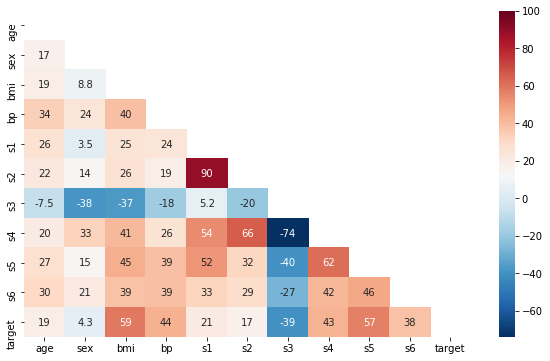

In [160]:
# Increase the figsize to 10x6
plt.figure(figsize=(10,6))

# Plot heatmap of correlations
sns.heatmap(df.corr()*100, cmap='RdBu_r',annot=True,mask=np.triu(df.corr()))

#### Let's plot a scatterplot of each independant variable wrt to the target to see how they both correlate.

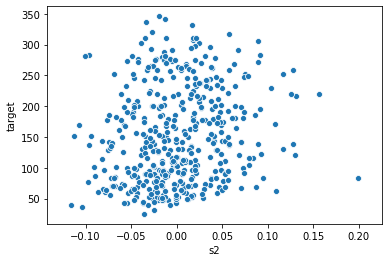

In [10]:
#for e.g. Feature 's2' vs 'target'
sns.scatterplot(x='s2', y='target', data=df)

#### Let' do the same for other features using a loop.

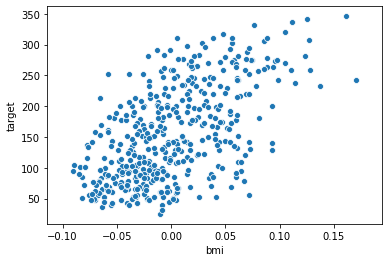

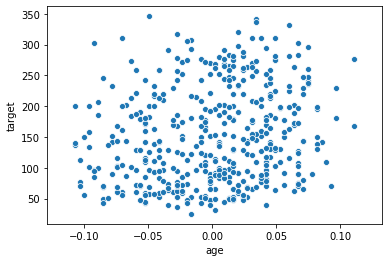

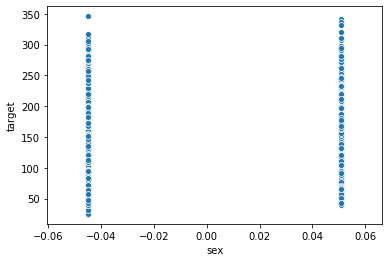

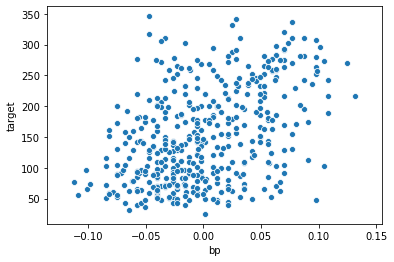

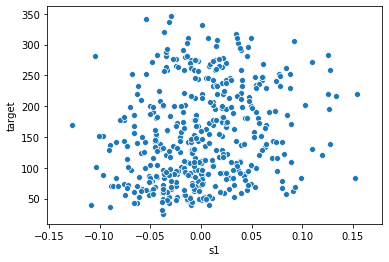

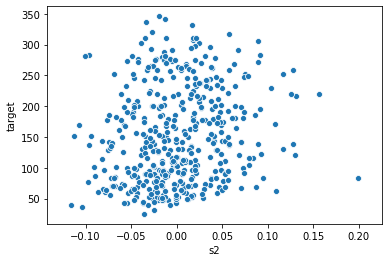

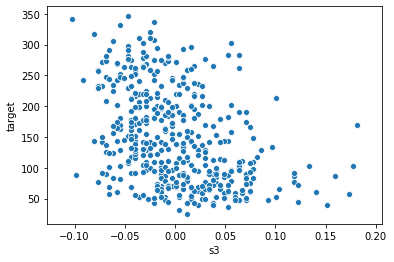

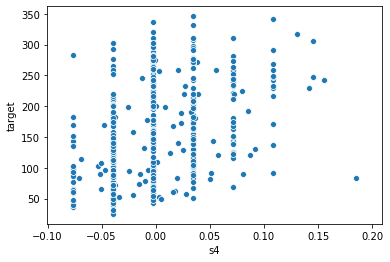

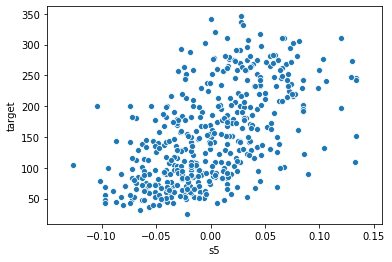

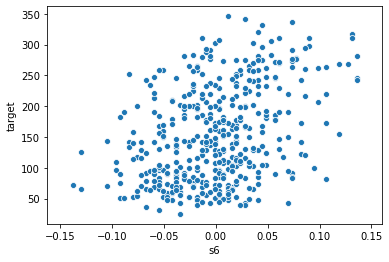

In [11]:
for x in ['bmi','age','sex','bp','s1','s2','s3','s4','s5','s6']:
    sns.scatterplot(x=x, y='target', data=df)
    plt.show()

### Let' use the correlation matrix heatmap and use features for predictions one by one. In the order of higher correlation to the lowest:

bmi (59%)

s5 (57%)

bp

s4

s3 (although negative corr, still 39% of the variance in the target is explained)

s6

s1

s2

age

sex (4.3%)


### Next, let's import the model

In [12]:
#Simple Linear Regression model
import statsmodels.api as sm

In [109]:
#Let's fit the model with Ordinary Least Square (OLS). This package provides detailed stats summary like AIC, BIC etc.
#lr = LinearRegression()
#model=lr.fit(x,y)
#ypred = model.predict(x)

In [166]:
#plt.scatter(x,y)
#plt.plot(x,ypred)

#### Let's predict the target with <code style="color:steelblue">'bmi'</code> feature

In [13]:
x = df[['bmi']]
y = df[['target']]

xa = sm.add_constant(x)
omodel = sm.OLS(y,xa)

olsmodel = omodel.fit()
ypred = olsmodel.predict(xa)

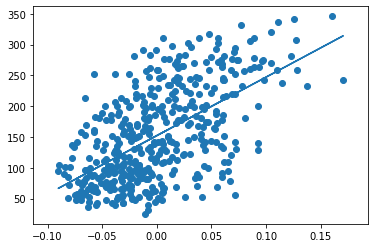

In [14]:
plt.scatter(x,y)
plt.plot(x,ypred)

In [217]:
#this command will give all the details.
olsmodel.summary()

In [15]:
#but we are only interested in r-square and adjusted r-square. So, let's just print that information only.
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.3439237602253803
Adj_Rsquared =  0.3424326778622562


#### Now add the 2nd feature <code style="color:steelblue">'s5'</code>

In [16]:
x2 = df[['bmi','s5']]
y2 = df[['target']]
xb = sm.add_constant(x2)
omodel = sm.OLS(y,xb)
olsmodel = omodel.fit()
ypred = olsmodel.predict(xb)

In [17]:
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.4594852440167805
Adj_Rsquared =  0.45702276221275673


#### Great! After adding the second feature, r-squared increased and also the adjusted r-square.

#### Now add the 3rd feature.

In [18]:
x3 = df[['bmi','s5','bp']]
y3 = df[['target']]
xc = sm.add_constant(x3)
omodel = sm.OLS(y,xc)
olsmodel = omodel.fit()
ypred = olsmodel.predict(xc)

In [19]:
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.48008281990946056
Adj_Rsquared =  0.47652174333349795


#### Keep going until you see the r-squared increase but the adjusted r-squared decreased or remaining the same.

In [22]:
x4 = df[['bmi','s5','bp','s4']]
y4 = df[['target']]
xd = sm.add_constant(x4)
omodel = sm.OLS(y,xd)
olsmodel = omodel.fit()
ypred = olsmodel.predict(xd)

In [23]:
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.4813108509655508
Adj_Rsquared =  0.4765631242009335


In [24]:
x5 = df[['bmi','s5','bp','s4','s3']]
y5 = df[['target']]
xe = sm.add_constant(x5)
omodel = sm.OLS(y,xe)
olsmodel = omodel.fit()
ypred = olsmodel.predict(xe)

In [25]:
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.4938732141751567
Adj_Rsquared =  0.4880690079156975


In [26]:
x6 = df[['bmi','s5','bp','s4','s3','s6']]
y6 = df[['target']]
xf = sm.add_constant(x6)
omodel = sm.OLS(y,xf)
olsmodel = omodel.fit()
ypred = olsmodel.predict(xf)

In [27]:
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.49436330923930294
Adj_Rsquared =  0.4873890100563968


#### The values didn't change much with addition of <code style="color:steelblue">'s6'</code>. You can choose to drop this feature. We'll keep for now and then compare results after dropping this feature.

In [28]:
x7 = df[['bmi','s5','bp','s4','s3','s6','s1']]
y7 = df[['target']]
xg = sm.add_constant(x7)
omodel = sm.OLS(y,xg)
olsmodel = omodel.fit()
ypred = olsmodel.predict(xg)

In [29]:
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.49857444498001213
Adj_Rsquared =  0.4904869360280768


In [30]:
x8 = df[['bmi','s5','bp','s4','s3','s6','s1','s2']]
y8 = df[['target']]
xh = sm.add_constant(x8)
omodel = sm.OLS(y,xh)
olsmodel = omodel.fit()
ypred = olsmodel.predict(xh)

In [31]:
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.500232039606541
Adj_Rsquared =  0.49099845142375187


In [32]:
x9 = df[['bmi','s5','bp','s4','s3','s6','s1','s2','age']]
y9 = df[['target']]
xi = sm.add_constant(x9)
omodel = sm.OLS(y,xi)
olsmodel = omodel.fit()
ypred = olsmodel.predict(xi)

In [33]:
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.5005804863066201
Adj_Rsquared =  0.4901759131046747


#### Adjusted r2 has dropped a little. You can choose to drop this feature as well. Let's just add the last feature to see the values.

In [34]:
x10 = df[['bmi','s5','bp','s4','s3','s6','s1','s2','age','sex']]
y10 = df[['target']]
xj = sm.add_constant(x10)
omodel = sm.OLS(y,xj)
olsmodel = omodel.fit()
ypred = olsmodel.predict(xj)

In [35]:
print('Rsquared = ',olsmodel.rsquared)
print('Adj_Rsquared = ',olsmodel.rsquared_adj)

Rsquared =  0.5177494254132934
Adj_Rsquared =  0.506560316954205


#### Looks like we can use all the features in this case. With the increasing R2, Ad. R2 has also increased for most of the features. We'll first run a model with all the features and then drop <code style="color:steelblue">'s6'</code> and <code style="color:steelblue">'age'</code>  since those are the features when added the adjusted r-squared values dropped a little.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
x = df[['bmi','s5','bp','s4','s3','s6','s1','s2','age','sex']]
y = df[['target']]

In [38]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [39]:
#We can confirm we have the right number of observations in each subset by
print( len(x_train), len(x_test), len(y_train), len(y_test) )

353 89 353 89


In [40]:
x_test.shape

(89, 10)

In [41]:
lr = LinearRegression()
model_lr = lr.fit(x_train,y_train)

In [42]:
lr_pred=model_lr.predict(x_test)

In [43]:
#Import performance matrices for evaluating models
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [57]:
print( 'Results with all the features:')
print( 'R^2:', r2_score(y_test, lr_pred ))
print( 'MAE:', mean_absolute_error(y_test, lr_pred))
print( 'MSE:', mean_squared_error(y_test, lr_pred))

Results with all the features:
R^2: 0.4626336507981068
MAE: 44.2421781690808
MSE: 2975.4370266710903


#### sklearn has no metric for Adjusted R2. To get that value count number of observations and features from x_test for the formula below. This is not relevant here. Just a note.



In [58]:
#sklearn has no metric for Adjusted R2. Count number of observations and features from x_test for the formula
#print('Adj_r2 = ',1-((1-0.4626336)*((89-1)/(89-10-1))))

## Now let' drop the features <code style="color:steelblue">'s6'</code> and <code style="color:steelblue">'age'</code> and see what results we get.

In [63]:
x = df[['bmi','s5','bp','s4','s3','s1','s2','sex']]
y = df[['target']]

In [64]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [65]:
lr = LinearRegression()
model_lr2 = lr.fit(x_train,y_train)

In [66]:
lr_pred2=model_lr2.predict(x_test)

In [67]:
print( 'Results with limited features:')
print( 'R^2:', r2_score(y_test, lr_pred2 ))
print( 'MAE:', mean_absolute_error(y_test, lr_pred2))
print( 'MSE:', mean_squared_error(y_test, lr_pred2))

Results with limited features:
R^2: 0.4793106693803706
MAE: 43.6715318835969
MSE: 2883.09514732221


### Notice, the r-square has improved and both the Mean Squared Error & the Mean Absolute Error have reduced.  Therefore, dropping those features definately helps the model.

### Watch what happens when you drop the feature with the highest correlation i.e. <code style="color:steelblue">'bmi'</code>

In [69]:
x = df[['s5','bp','s4','s3','s1','s2','sex']]
y = df[['target']]

In [70]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [71]:
lr = LinearRegression()
model_lr3 = lr.fit(x_train,y_train)

In [72]:
lr_pred3=model_lr3.predict(x_test)

In [74]:
print( "Results without 'bmi' feature:")
print( 'R^2:', r2_score(y_test, lr_pred3 ))
print( 'MAE:', mean_absolute_error(y_test, lr_pred3))
print( 'MSE:', mean_squared_error(y_test, lr_pred3))

Results without 'bmi' feature:
R^2: 0.40807988795944217
MAE: 45.26985784875776
MSE: 3277.505226764897


These results are the worst until now.

## We'll try a polynomial regression with all features and see if it improves the R2 score.

In [47]:
#first let' take all the features. then we can try with one feature.
x = df.drop('target', axis=1)
y = df.target

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
pf2 = PolynomialFeatures(degree=2)

In [50]:
x2 = pf2.fit_transform(x)

In [51]:
x2.shape

(442, 66)

In [52]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=1234)

In [53]:
#We can confirm we have the right number of observations in each subset by
print( len(x_train), len(x_test), len(y_train), len(y_test) )

353 89 353 89


In [54]:
lr = LinearRegression()
model_lr2 = lr.fit(x_train,y_train)

In [55]:
lr2_pred=model_lr2.predict(x_test)

In [56]:
print( 'R^2:', r2_score(y_test, lr2_pred ))
print( 'MAE:', mean_absolute_error(y_test, lr2_pred))
print( 'MSE:', mean_squared_error(y_test, lr2_pred))

R^2: 0.42413497326512384
MAE: 43.89893073826056
MSE: 3188.607037743872


### <code style="color:Crimson">Hence for this dataset, a Simple Linear Regression is the best model.</code>